In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

# Set the font family to Cmr10
plt.rcParams['font.family'] = 'Cmr10'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cmr10'
plt.rcParams['mathtext.it'] = 'Cmr10:italic'
plt.rcParams['mathtext.bf'] = 'Cmr10:bold'

plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

In [2]:
df = pd.read_csv('Data/Glycerol.csv')

In [3]:
df.head()

,diameter (mm) +- 0.01,Time (s) +- 0.005,distance fallen (m),terminal velocity,R2 (m2),V_T error,R^2 error
0,1.8,15.975371,0.203333,0.012728,8.100000e-07,0.000038,9.000000e-08
1,2.8,8.362108,0.203333,0.024316,1.960000e-06,0.000073,1.400000e-07
2,3.8,4.842534,0.203333,0.041989,3.610000e-06,0.000129,1.900000e-07
3,4.8,3.244997,0.203333,0.062661,5.760000e-06,0.000202,2.400000e-07
4,5.8,2.271498,0.203333,0.089515,8.410000e-06,0.000311,2.900000e-07


In [4]:
df = pd.read_csv('Data/Glycerol.csv', 
                        names=(r'Terminal Velocity / ms$^{-1}$', r'Radius Squared / m$^2$', r'v$_T$ error', r'R$^2$ error'), 
                        usecols=(3, 4, 5, 6),
                        skiprows=1)
df

,Terminal Velocity / ms$^{-1}$,Radius Squared / m$^2$,v$_T$ error,R$^2$ error
0,0.012728,8.100000e-07,0.000038,9.000000e-08
1,0.024316,1.960000e-06,0.000073,1.400000e-07
2,0.041989,3.610000e-06,0.000129,1.900000e-07
3,0.062661,5.760000e-06,0.000202,2.400000e-07
4,0.089515,8.410000e-06,0.000311,2.900000e-07
5,0.117207,1.156000e-05,0.000446,3.400000e-07
6,0.146508,1.521000e-05,0.000616,3.900000e-07
7,0.179030,1.936000e-05,0.000842,4.400000e-07
8,0.214365,2.401000e-05,0.001133,4.900000e-07
9,0.280892,3.481000e-05,0.001815,5.900000e-07


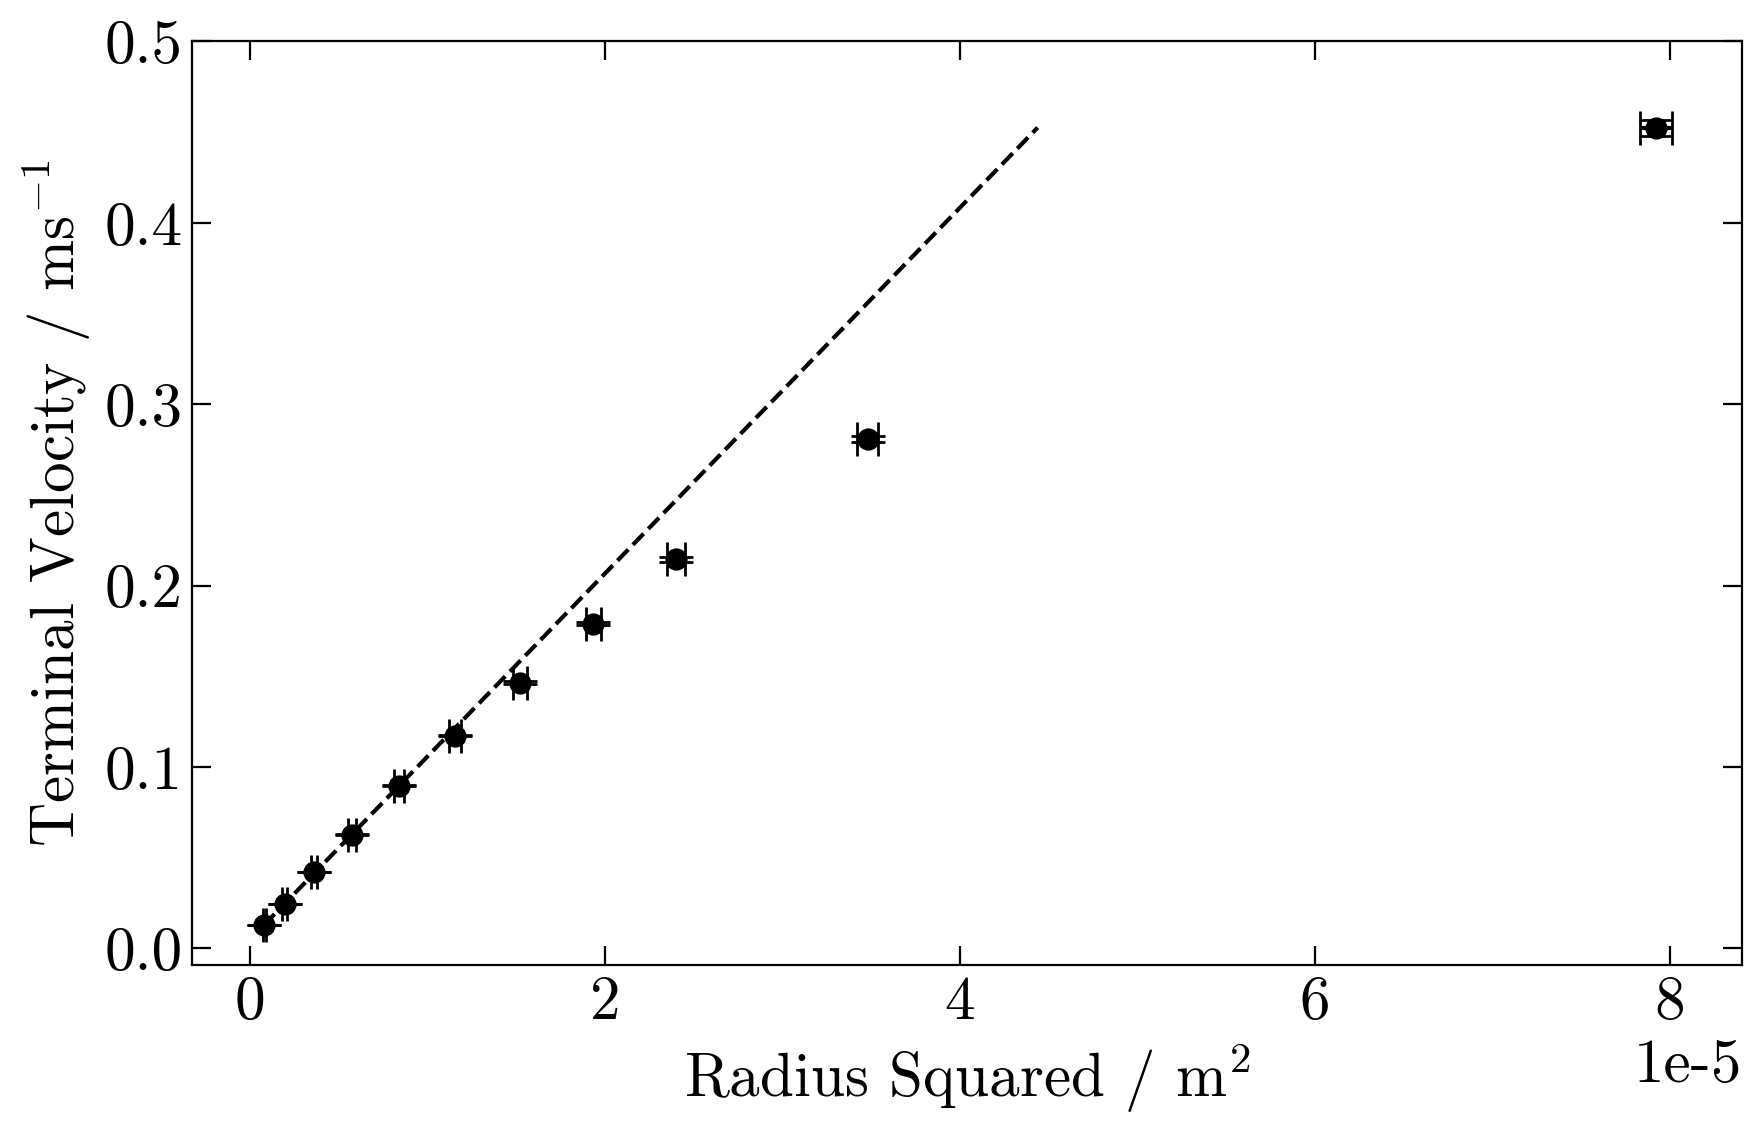

In [5]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

ax.errorbar(df[r'Radius Squared / m$^2$'],
            df[r'Terminal Velocity / ms$^{-1}$'],
            xerr = df[r'R$^2$ error'],
            yerr = df[r'v$_T$ error'],
            marker='o',
            markersize=7,
            color='black',
            ecolor='black',
            markerfacecolor='black',
            linestyle='none',
            capsize=6
            )

plt.xlabel(r'Radius Squared / m$^2$')
plt.ylabel(r'Terminal Velocity / ms$^{-1}$')
plt.ylim(None, 0.5)

plt.tick_params(direction='in', length=7, bottom='on', left='on', top='on', right='on')

subset = df.head(5)

def line(x, slope, intercept):
    return slope * x + intercept

popt, pcov = curve_fit(line, subset[r'Radius Squared / m$^2$'], subset[r'Terminal Velocity / ms$^{-1}$'])
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))


y_values = np.linspace(min(df[r'Terminal Velocity / ms$^{-1}$']), max(df[r'Terminal Velocity / ms$^{-1}$']), 100)
x_values = (y_values - intercept) / slope


plt.plot(x_values, y_values, linestyle='--', color='black')

plt.margins()
plt.show()

In [6]:
print(f'{slope} ± {err_slope}')

10088.671026299055 ± 84.61888055180991


In [7]:
fig.savefig('figures/glycfreefall.png', dpi=300)